# NLP 

Es gibt im Fragebogen einige (wenige) Textfelder. Analysiert die dortigen Eingaben über NLP-Techniken indem ihr Wort-Vektoren nutzt. Könnt ihr die Teilnehmer*innen Anhand dieser Daten clustern?

***

In [57]:
import pandas as pd
import nltk
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import seaborn as sb 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import json

In [2]:
filename = "./data/survery_data_annonymized_230626_clean.csv"
data = pd.read_csv(filename)

## Tfidf-Vectoren

Fav_Sportart, Fav_Essen in Tfidf-Vetoren umwandeln und mit KMeans mögliche Cluster herausfinden.

Fav_Musik, mithilfe von Spotify-API Genre herausfinden und anhand der Genres clustern.

### Fav_Sportart

In [3]:
sportarten = data['Fav_Sportart']
sportarten.value_counts()

Fußball              10
Keine Angabe          5
Bouldern/Klettern     5
Tischtennis           4
Badminton             3
Basketball            3
Tauchen               2
Reiten                2
Volleyball            2
Radfahren             2
Joggen/Laufen         2
Calisthenics          2
Tanzen                1
Hockey                1
Squash                1
Bogenschießen         1
Yoga                  1
Inlineskaten          1
Rudern                1
Padel-Tennis          1
Kraftsport            1
Fitness               1
Karate                1
E-Sport               1
Schwimmen             1
Thaiboxen             1
Football              1
Kampfsport            1
Tennis                1
Schnorcheln           1
Trampolin             1
Ski                   1
Name: Fav_Sportart, dtype: int64

### [Verworfen] Token und Lemmatization
- Intention wäre hier für das Clustern von Sportarten die Wortzusammensetzungen zu trennen
    - z.B. Erkennen von 'ball' oder 'tennis' im Wort zum clustern aller Ball-Sportarten und Tennis-Sportarten
- Aber Stemming und Lemmatization konnten 'ball' oder 'tennis' nicht erkennen

In [53]:
for entry in sportarten:
    tokenizer = nltk.tokenize.TreebankWordTokenizer()
    tokens = tokenizer.tokenize(entry)
    stemmer = nltk.stem.SnowballStemmer("german")
    print([stemmer.stem(w) for w in tokens])

['joggen/lauf']
['fussball']
[]
['trampolin']
['bouldern/klett']
['bouldern/klett']
[]
['fussball']
['schnorcheln']
['tennis']
[]
['kampfsport']
['football']
['thaibox']
['calisthenics']
['calisthenics']
['tauch']
['tischtennis']
['tischtennis']
['basketball']
['fussball']
['schwimm']
['fussball']
['basketball']
['radfahr']
['fitness']
['tischtennis']
['fussball']
['esport']
['reit']
['tischtennis']
['karat']
[]
['badminton']
['bouldern/klett']
['radfahr']
['tanz']
['kraftsport']
['volleyball']
['bogenschiess']
['bouldern/klett']
['hockey']
['badminton']
['reit']
['squash']
['tauch']
['fussball']
['fussball']
['fussball']
['bouldern/klett']
['yoga']
['badminton']
['inlineskat']
['basketball']
['fussball']
['volleyball']
['joggen/lauf']
[]
['fussball']
['rud']
['padeltennis']
['ski']


In [54]:
nlp = spacy.load('de_core_news_sm') 

for entry in sportarten:
    doc = nlp(entry)
    print([token.text for token in doc])
    print([token.lemma_ for token in doc])
    print([token for token in doc])

['Joggen', '/', 'Laufen']
['Joggen', '--', 'laufen']
[Joggen, /, Laufen]
['Fußball']
['Fußball']
[Fußball]
[]
[]
[]
['Trampolin']
['Trampolin']
[Trampolin]
['Bouldern', '/', 'Klettern']
['Boulder', '--', 'Kletter']
[Bouldern, /, Klettern]
['Bouldern', '/', 'Klettern']
['Boulder', '--', 'Kletter']
[Bouldern, /, Klettern]
[]
[]
[]
['Fußball']
['Fußball']
[Fußball]
['Schnorcheln']
['Schnorchel']
[Schnorcheln]
['Tennis']
['Tennis']
[Tennis]
[]
[]
[]
['Kampfsport']
['Kampfsport']
[Kampfsport]
['Football']
['Football']
[Football]
['Thaiboxen']
['thaiboxen']
[Thaiboxen]
['Calisthenics']
['Calisthenic']
[Calisthenics]
['Calisthenics']
['Calisthenic']
[Calisthenics]
['Tauchen']
['tauchen']
[Tauchen]
['Tischtennis']
['Tischtennis']
[Tischtennis]
['Tischtennis']
['Tischtennis']
[Tischtennis]
['Basketball']
['Basketball']
[Basketball]
['Fußball']
['Fußball']
[Fußball]
['Schwimmen']
['Schwimme']
[Schwimmen]
['Fußball']
['Fußball']
[Fußball]
['Basketball']
['Basketball']
[Basketball]
['Radfahren']
[

In [5]:
vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1,2))

tfidf_sportarten = vectorizer.fit_transform(sportarten)
tfidf_sportarten.data.shape

(88,)

In [6]:
kmeans = KMeans(n_clusters=12,random_state=0, n_init=10).fit(tfidf_sportarten) #ausprobieren, wie viele Cluster sinn ergeben

In [7]:
label_sportarten = kmeans.predict(tfidf_sportarten) #mögliche Labels vorhersagen für die einzelnen Sportarten
label_sportarten

array([ 0,  1,  3,  0,  7,  7,  3,  1,  0,  5,  3,  0,  0,  0, 11, 11,  4,
        8,  8,  2,  1,  0,  1,  2,  9,  0,  8,  1,  0,  0,  8,  0,  3, 10,
        7,  9,  0,  0,  6,  0,  7,  0, 10,  0,  0,  4,  1,  1,  1,  7,  0,
       10,  0,  2,  1,  6,  0,  3,  1,  0,  5,  0], dtype=int32)

In [8]:
#Cluster erstellen, jeweiligen Sportarten zu den Clustern zuordnen
cluster = {}
n = 0
for item in label_sportarten:
    try:
        if item in cluster:
            cluster[item].append(sportarten[n])
        else:
            cluster[item] = [sportarten[n]]
        n +=1
    except KeyError:
        continue  

In [9]:
for item in cluster:
    print ("Cluster " + str(item) + ": ")
    for i in cluster[item]:
        print("- " + i)

Cluster 0: 
- Joggen/Laufen
- Trampolin
- Schnorcheln
- Kampfsport
- Football
- Thaiboxen
- Schwimmen
- Fitness
- E-Sport 
- Reiten
- Karate
- Tanzen
- Kraftsport 
- Bogenschießen
- Hockey
- Reiten
- Squash
- Yoga
- Inlineskaten
- Joggen/Laufen
- Rudern
- Ski
Cluster 1: 
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
- Fußball
Cluster 3: 
- Keine Angabe
- Keine Angabe
- Keine Angabe
- Keine Angabe
- Keine Angabe
Cluster 7: 
- Bouldern/Klettern
- Bouldern/Klettern
- Bouldern/Klettern
- Bouldern/Klettern
- Bouldern/Klettern
Cluster 5: 
- Tennis
- Padel-Tennis
Cluster 11: 
- Calisthenics
- Calisthenics
Cluster 4: 
- Tauchen
- Tauchen
Cluster 8: 
- Tischtennis
- Tischtennis
- Tischtennis
- Tischtennis
Cluster 2: 
- Basketball
- Basketball
- Basketball
Cluster 9: 
- Radfahren
- Radfahren
Cluster 10: 
- Badminton
- Badminton
- Badminton
Cluster 6: 
- Volleyball
- Volleyball


<AxesSubplot:xlabel='label_sportarten', ylabel='Pseudonym'>

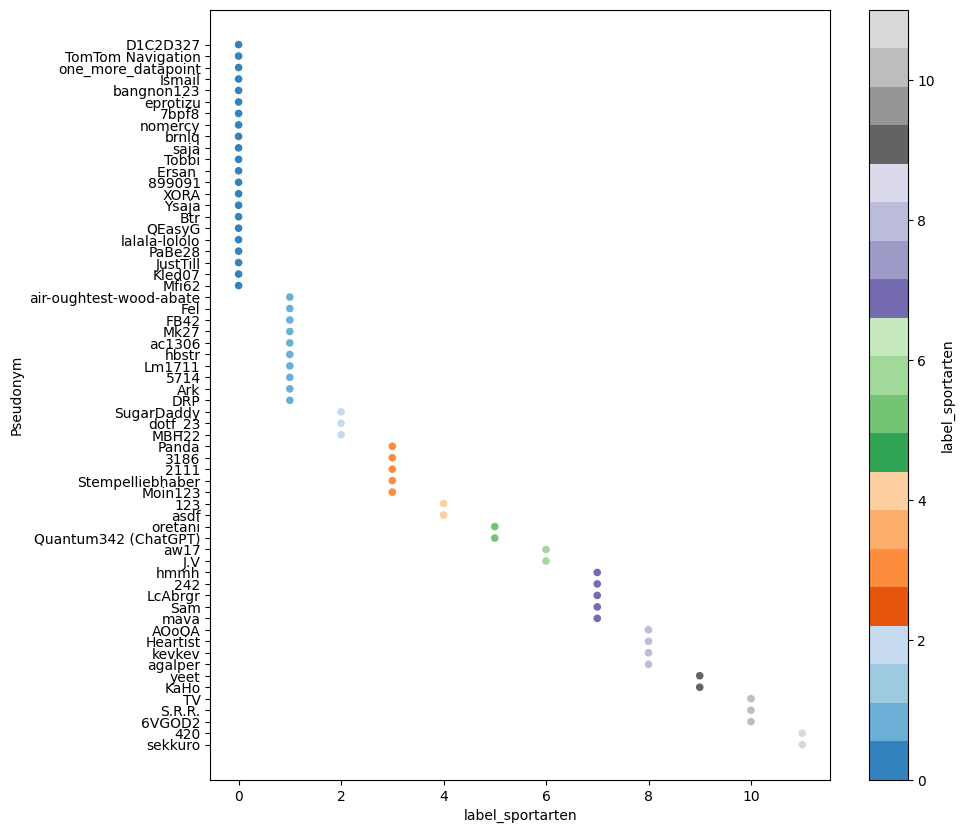

In [81]:
data["label_sportarten"] = label_sportarten
data_sorted = data.sort_values(by='label_sportarten', ascending=False)

data_sorted.plot(kind="scatter",x="label_sportarten",y="Pseudonym", c="label_sportarten",cmap="tab20c",figsize=(10,10))

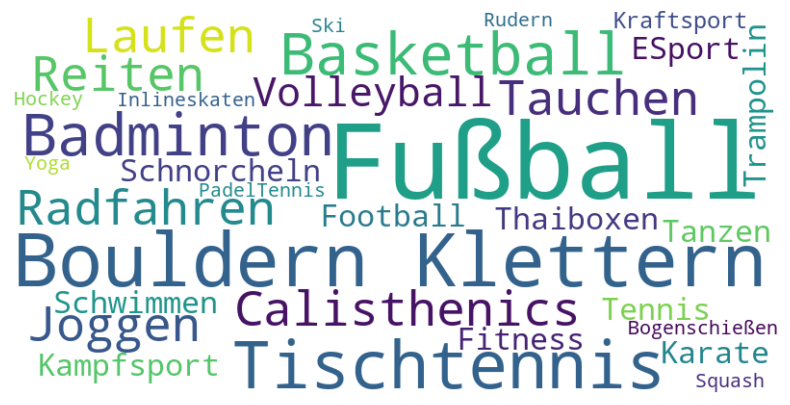

In [82]:
# Keine Angabe für die Darstellung herausnehmen
sportarten = sportarten.str.replace('Keine Angabe','')
sportarten = sportarten.str.replace('-','') # Bindestrich macht Probleme
concatenated_text = ' '.join(sportarten)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Fav_Essen

In [11]:
essen = data["Fav_Essen"]

tfidf_essen = vectorizer.fit_transform(essen)
tfidf_essen.data

array([0.64640552, 0.48682101, 0.58750762, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.57735027, 0.57735027, 0.57735027,
       1.        , 0.6165583 , 0.48960364, 0.6165583 , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.39840751,
       0.39840751, 0.39840751, 0.39840751, 0.39840751, 0.27429253,
       0.3621062 , 0.57735027, 0.57735027, 0.57735027, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.4727726 ,
       0.4727726 , 0.4727726 , 0.4727726 , 0.32549084, 1.        ,
       1.        , 1.        , 0.48223922, 0.48223922, 0.48223922,
       0.33200835, 0.43829951, 0.57735027, 0.57735027, 0.57735027,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 0.4727726 , 0.4727726 , 0.47277

In [12]:
kmeans = KMeans(n_clusters=12,random_state=0, n_init=20).fit(tfidf_essen)

In [13]:
label_essen = kmeans.predict(tfidf_essen) #mögliche Labels vorhersagen
label_essen

array([ 1,  6,  1, 10,  6,  7,  6,  8,  4, 11,  6,  5,  0,  6,  6, 10,  3,
       10,  6, 10,  4, 10,  4,  6,  2,  5,  6,  4,  6,  8,  4,  1,  5,  0,
        1,  9,  3,  5, 11,  6,  2,  1,  6,  6, 11,  3,  0,  6,  9,  4,  6,
        6,  8,  6,  9,  6,  9,  6,  2,  0,  7,  2], dtype=int32)

In [14]:
cluster_essen = {}
n = 0
for item in label_essen:
    try:
        if item in cluster_essen:
            cluster_essen[item].append(essen[n])
        else:
            cluster_essen[item] = [essen[n]]
        n +=1
    except KeyError:
        continue  

In [83]:
for item in cluster_essen:
    print ("Cluster " + str(item) + ": ")
    for i in cluster_essen[item]:
        print("- " + i)

Cluster 1: 
- Vegane Lasagne
- Lasagne
- Lasagne
- Lasagne
- Lasagne
Cluster 6: 
- Butterbrot
- Dampfnudeln
- Tomaten
- Koreanisches Dakgangjeong
- Hühnchen
- Curry
- Risotto
- Reis mit Sojasoße Hähnchen
- Burrito
- Shakshuka
- Gemüsepfanne mit Reis
- Hamburger
- Tortellini
- Yaprak
- Ramen
- Humus
- Cordon bleu
- Carbonara
- Pommes 
Cluster 10: 
- Burger
- Burger
- Burger
- Burger
- Burger
Cluster 7: 
- Pho
- Vegane Pho Bo Suppe
Cluster 8: 
- Pasta
- Pasta
- Pasta
Cluster 4: 
- Pizza
- Pizza
- Pizza
- Pizza
- Pizza
- Pizza
Cluster 11: 
- Sushi
- Sushi
- Sushi
Cluster 5: 
- Döner
- Döner
- Döner
- Döner
Cluster 0: 
- Asiatische Nudeln
- Nudeln
- Nudeln
- Nudeln mit Pilzen in Sahnesauce
Cluster 3: 
- Pfannkuchen
- Pfannkuchen
- Pfannkuchen
Cluster 2: 
- Keine Angabe
- Keine Angabe
- Keine Angabe
- Keine Angabe
Cluster 9: 
- Gurke mit Mozzarella 
- Lachs mit Bratkartoffeln 
- Reispfanne mit viel Gemüse
- Ofenkartoffeln mit Gemüse


In [64]:
data["labels_essen"] = label_essen
data_sorted = data.sort_values(by='labels_essen', ascending=False)

<AxesSubplot:xlabel='Gesunde_Ernaehrung', ylabel='Alter'>

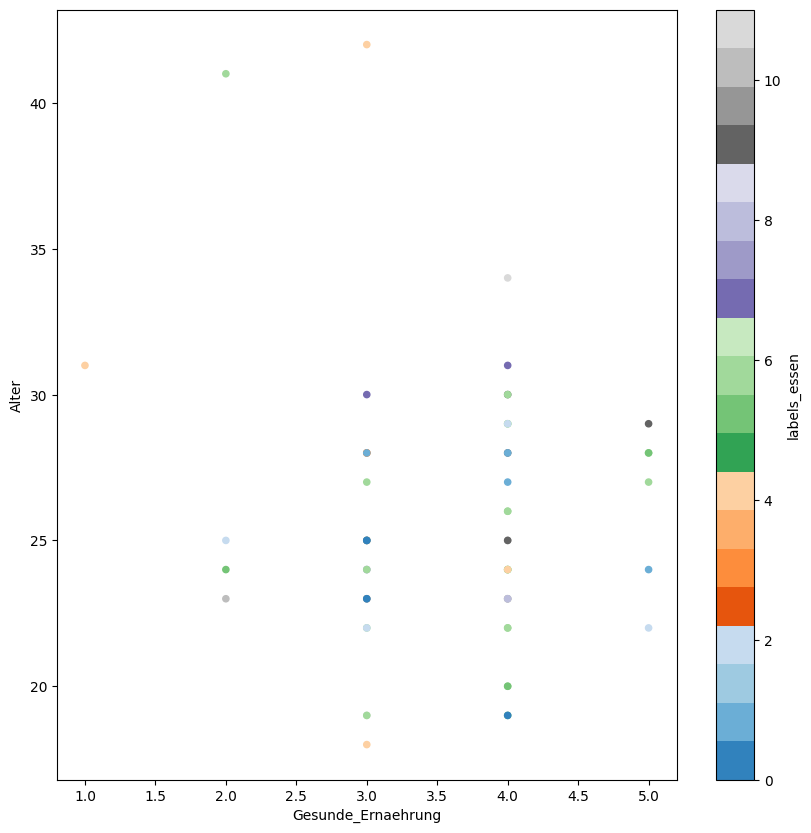

In [74]:
data_sorted.plot(kind="scatter",y="Alter",x="Gesunde_Ernaehrung", c="labels_essen",cmap="tab20c",figsize=(10,10))

<AxesSubplot:xlabel='Alter', ylabel='Pseudonym'>

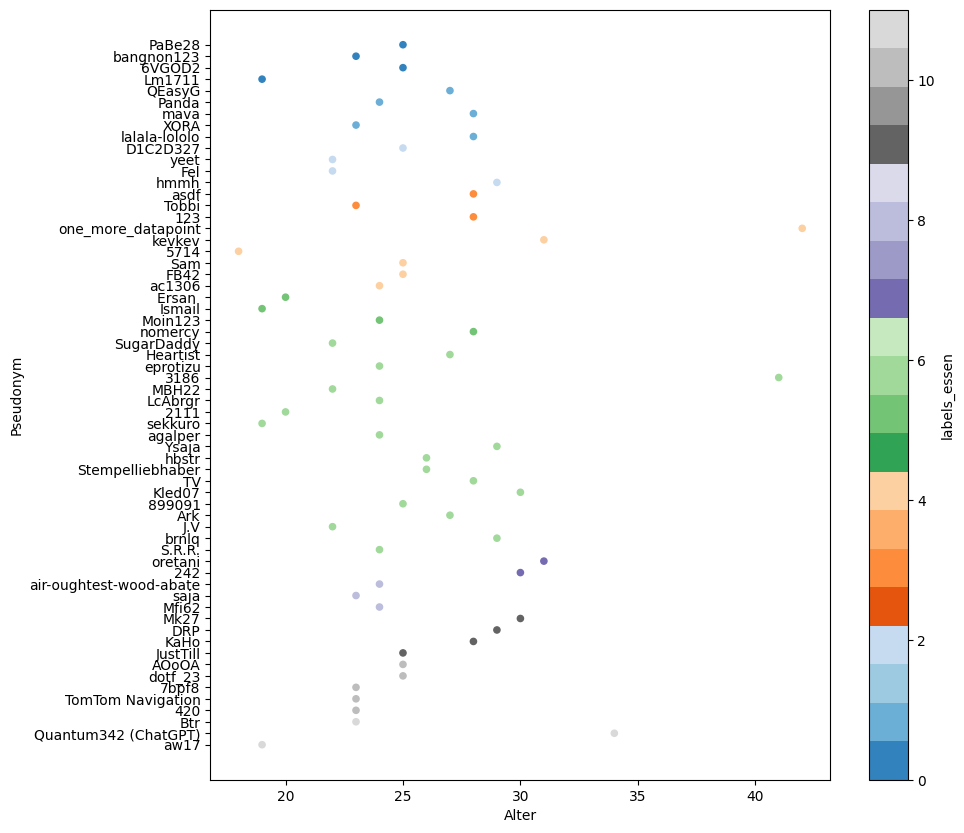

In [76]:
data_sorted.plot(kind="scatter",x="Alter",y="Pseudonym", c="labels_essen",cmap="tab20c",figsize=(10,10))

<AxesSubplot:xlabel='labels_essen', ylabel='Pseudonym'>

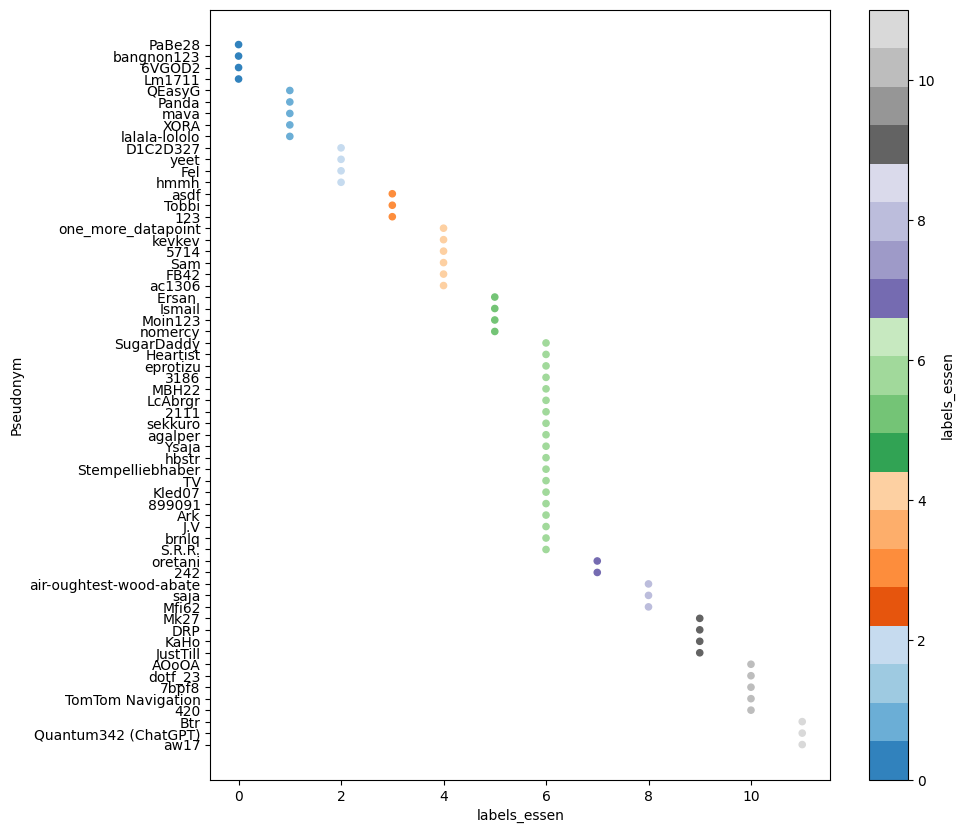

In [69]:
data_sorted.plot(kind="scatter",x="labels_essen",y="Pseudonym", c="labels_essen",cmap="tab20c",figsize=(10,10))

<AxesSubplot:xlabel='Gesunde_Ernaehrung', ylabel='labels_essen'>

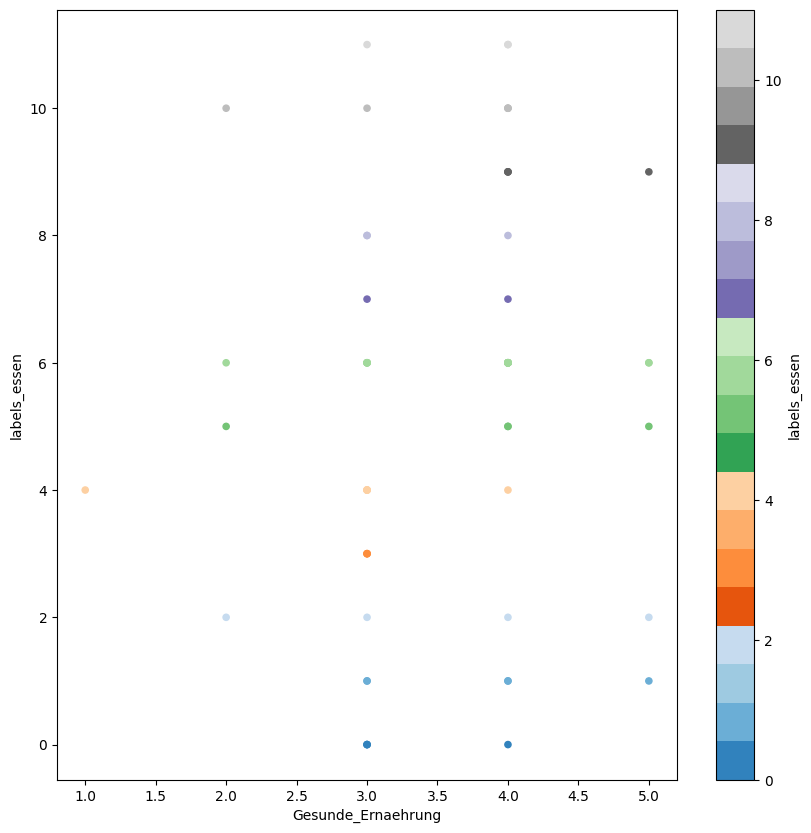

In [73]:
data.plot(kind="scatter",y="labels_essen",x="Gesunde_Ernaehrung", c="labels_essen",cmap="tab20c",figsize=(10,10))

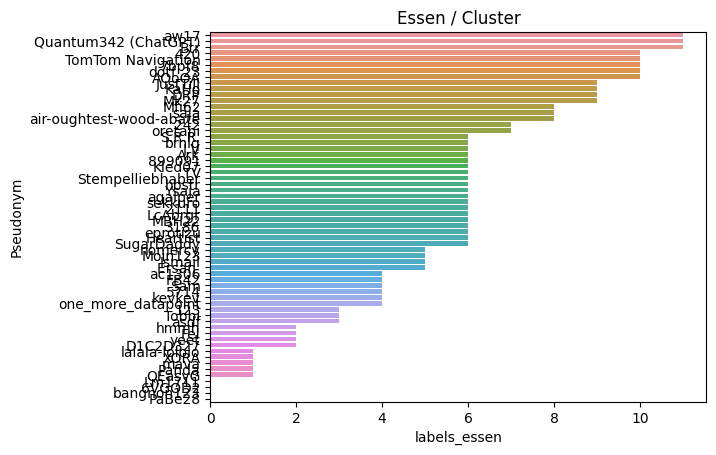

In [80]:
sb.barplot(x='labels_essen',y='Pseudonym', data=data_sorted)
plt.title("Essen / Cluster")
plt.show()

### Fav_Musik

In [16]:
musik = data["Fav_Musik"]

In [17]:
client_id = '41a0688d3752459bac10ddb127765ea2'
client_secret = '7fedd9c245e14936873e7ccb5df7ec89'

auth_url = 'https://accounts.spotify.com/api/token'
auth_data = {
    'grant_type': 'client_credentials',
    'client_id': client_id,
    'client_secret': client_secret,
}
auth_response = requests.post(auth_url, data=auth_data)

access_token = auth_response.json().get('access_token')

headers = {
     'Accept': 'application/json',
     'Content-Type': 'application/json',
     'Authorization': 'Bearer {}'.format(access_token)}

In [18]:
for artist in musik:
    if 'Keine Angabe' in artist:
        continue

    artist_url = artist.replace(' ', '%20') # URL encoding for spaces
    url = f"https://api.spotify.com/v1/search?type=artist&q={artist_url}" #nach den Artisten mit dem Namen suchen
    response = requests.get(url, headers=headers)                   
    json_data = json.loads(response.text)

    items = json_data['artists']['items']
    for item in items:
        if(artist.lower() in item['name'].lower()):
            if(item['genres']):
                data.loc[data['Fav_Musik'] == artist, 'Musik_Genre'] = item['genres'][0]#Mehrere hinterlegt, erste sollte ausreichen

In [19]:
data["Musik_Genre"].value_counts()

alternative metal           3
singer-songwriter pop       2
german hip hop              2
tribute                     2
hip hop                     2
alternative rock            2
pop                         2
antideutsche                2
classical piano trio        1
german pop                  1
symphonic death metal       1
indie rock italiano         1
german soundtrack           1
german indie                1
canadian punk               1
atl hip hop                 1
glitchbreak                 1
avant-garde black metal     1
uk dnb                      1
german alternative rock     1
electropop                  1
chicago house               1
future garage               1
violin                      1
deep underground hip hop    1
dark techno                 1
chicago rap                 1
dfw rap                     1
german indie folk           1
american metalcore          1
venezuelan hip hop          1
alternative pop rock        1
jazz rap                    1
modern roc

In [20]:
musik_genre = data["Musik_Genre"].fillna('Keine Angabe')

In [21]:
tfidf_musik = vectorizer.fit_transform(musik_genre)
tfidf_musik.data

array([0.64063146, 0.5950641 , 0.48527317, 1.        , 0.43495372,
       0.5477376 , 0.36260456, 0.36260456, 0.49782994, 0.57735027,
       0.57735027, 0.57735027, 0.57735027, 0.57735027, 0.57735027,
       0.57735027, 0.57735027, 0.57735027, 0.45520098, 0.45520098,
       0.45520098, 0.41372488, 0.45520098, 0.66455532, 0.43993837,
       0.60400369, 0.60715048, 0.51257838, 0.60715048, 0.64684812,
       0.53925296, 0.53925296, 0.54290835, 0.54290835, 0.39006849,
       0.35940757, 0.35940757, 0.57735027, 0.57735027, 0.57735027,
       1.        , 0.37217534, 0.54058142, 0.37217534, 0.37217534,
       0.54058142, 0.57735027, 0.57735027, 0.57735027, 0.57735027,
       0.57735027, 0.57735027, 1.        , 0.46499549, 0.46499549,
       0.46499549, 0.46499549, 0.36758234, 0.64406598, 0.57455377,
       0.50504156, 0.57735027, 0.57735027, 0.57735027, 0.49920198,
       0.49920198, 0.45371669, 0.42144436, 0.34368674, 0.60715048,
       0.60715048, 0.51257838, 0.62760348, 0.57041876, 0.52984

In [22]:
kmeans = KMeans(n_clusters=7,random_state=0, n_init=10).fit(tfidf_musik)

In [23]:
label_musik = kmeans.predict(tfidf_musik) #mögliche Labels vorhersagen
label_musik

array([5, 1, 2, 4, 4, 4, 1, 2, 1, 2, 2, 4, 5, 6, 4, 4, 0, 5, 3, 1, 5, 1,
       1, 3, 4, 1, 1, 6, 6, 1, 4, 5, 1, 4, 3, 1, 5, 4, 6, 3, 4, 2, 5, 1,
       6, 0, 1, 3, 1, 6, 1, 2, 2, 1, 5, 4, 4, 6, 4, 4, 2, 4], dtype=int32)

In [24]:
cluster_genre = {}
n = 0
for item in label_musik:
    try:
        if item in cluster_genre:
            cluster_genre[item].append(musik_genre[n])
        else:
            cluster_genre[item] = [musik_genre[n]]
        n +=1
    except KeyError:
        continue  

In [25]:
for item in cluster_genre:
    print ("Cluster ", item)
    for i in cluster_genre[item]:
        print(i)

Cluster  5
german indie
pop
singer-songwriter pop
german indie folk
singer-songwriter pop
german pop
german soundtrack
pop
Cluster  1
tribute
italian classical guitar
jazz rap
american metalcore
dfw rap
chicago rap
dark techno
future garage
violin
canadian punk
chicago house
classical piano trio
glitchbreak
tribute
uk dnb
electropop
Cluster  2
modern alternative rock
modern rock
alternative rock
alternative pop rock
indie rock italiano
german alternative rock
alternative rock
acoustic rock
Cluster  4
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Keine Angabe
Cluster  6
venezuelan hip hop
deep underground hip hop
german hip hop
hip hop
atl hip hop
hip hop
german hip hop
Cluster  0
antideutsche
antideutsche
Cluster  3
alternative metal
alternative metal
alternative metal
symphonic death metal
avant-garde black metal


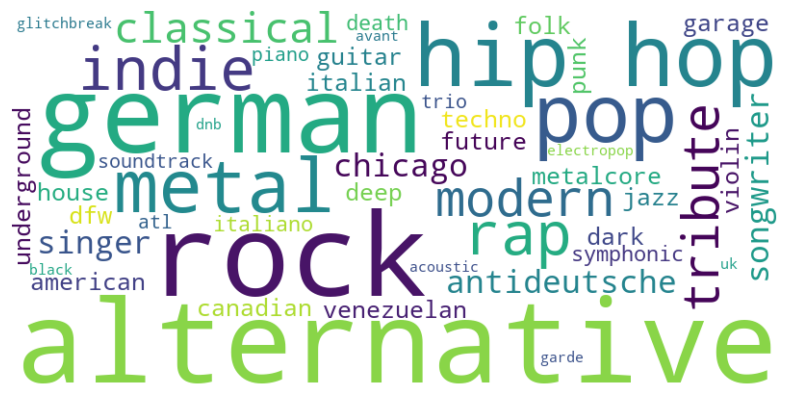

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#kein favorit für die Darstellung herausnehmen
musik_genre = musik_genre.str.replace('Keine Angabe','')
concatenated_text = ' '.join(musik_genre)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(concatenated_text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Fazit
- Fav_Sportart lässt sich nicht gut clustern, da mit Hilfe von NLP-Techniken wie Lemma/Stemma Wortteile wie 'ball' und 'tennis' nicht trennen lassen, somit kann mit den Wortvektoren nur nach doppelten Benennungen geclustert werden und nicht nach Kategorien wie Ball-Sportarten o.ä.
- Fav_Essen lässt sich nicht gut clustern, aufgrund des gleichen Problems mit z.B. 'nudeln', desweiteren müssen aus bei den längeren Angaben 
- Fav_Musik lässt sich gut nach Musik Genre clustern